In [2]:
import urllib2
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
# Get ratings and reviews

taj = "https://www.yelp.com/biz/taj-indian-cuisine-tampa"
Umall ="https://www.yelp.com/biz/university-mall-tampa"
auto ="https://www.yelp.com/biz/bay-area-automotive-services-tampa"

url2 = auto
start = 0
num_pages = 5
end = 20* num_pages

ratings =[]
reviews =[]

while (start < end):
    url = url2 + '?start=' + str(start)
    start +=20
    print url

    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page)

    
    for reviewBody in soup.findAll('div',{"class":"review-content"}):
        ratings.append(reviewBody.div.div.div.get("title"))
        reviews.append(reviewBody.find('p').text)
print ratings
#print reviews

https://www.yelp.com/biz/bay-area-automotive-services-tampa?start=0
https://www.yelp.com/biz/bay-area-automotive-services-tampa?start=20
https://www.yelp.com/biz/bay-area-automotive-services-tampa?start=40
https://www.yelp.com/biz/bay-area-automotive-services-tampa?start=60
https://www.yelp.com/biz/bay-area-automotive-services-tampa?start=80
['5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '1.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating', '5.0 star rating']


In [8]:
df = pd.DataFrame()

df['rating']=ratings
df['review']=reviews

ratings1=[]
for rating in df['rating']:
    ratings1.append(int(rating[:1]))

df['rating']= ratings1
#df['rating']

#df.to_csv("E:\yelp Reviews\\reviews.csv", encoding='utf-8')

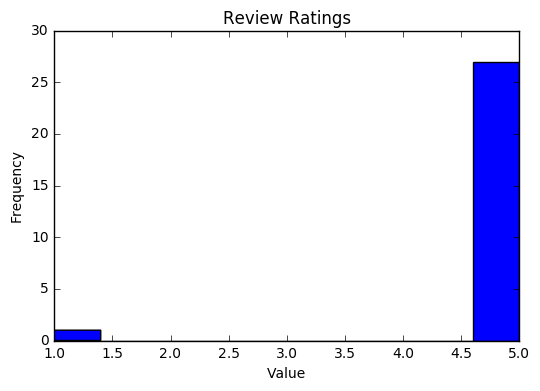

In [9]:
import matplotlib.pyplot as plt
from numpy.random import normal
plt.hist(ratings1)
plt.title("Review Ratings")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

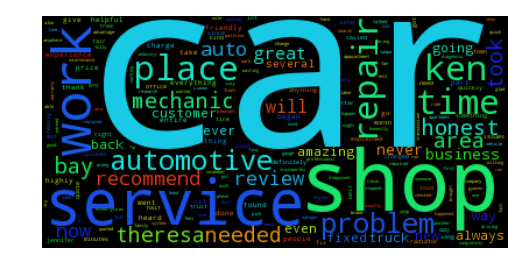

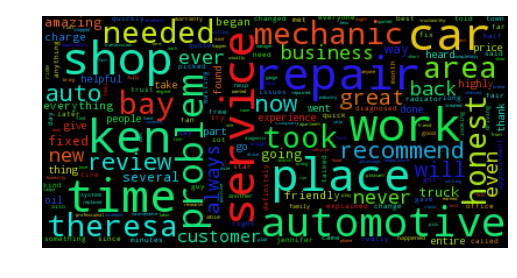

In [10]:
from os import path
from wordcloud import WordCloud

# Read the whole text.
text =""
for review in df['review']:
    text= text + review

    
text = text.lower()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()